<a href="https://colab.research.google.com/github/1234-ad/1234-ad/blob/main/Project_1_for_GNCIPL_Titanic_Survival_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
# 🛳️ Titanic Survival Analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Load the Dataset

In [ ]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Data Cleaning

In [ ]:
df.info()
df = df.drop(['deck', 'embark_town', 'alive', 'who', 'adult_male'], axis=1)
df.dropna(inplace=True)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,False
1,1,1,female,38.0,1,0,71.2833,C,First,False
2,1,3,female,26.0,0,0,7.9250,S,Third,True
3,1,1,female,35.0,1,0,53.1000,S,First,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True


Descriptive Statistics

In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Survival by Sex

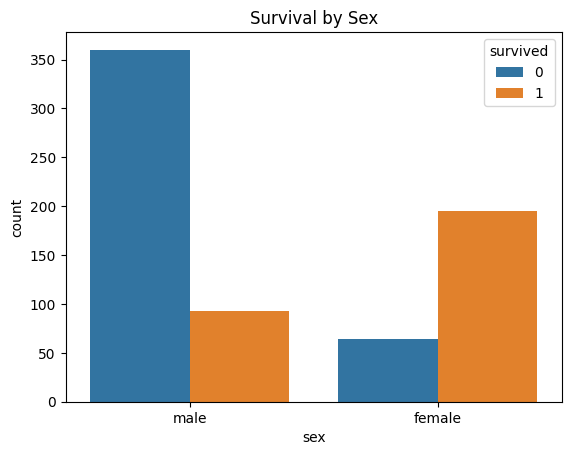

In [ ]:
sns.countplot(data=df, x='sex', hue='survived')
plt.title('Survival by Sex')
plt.show()

Survival by Passenger Class

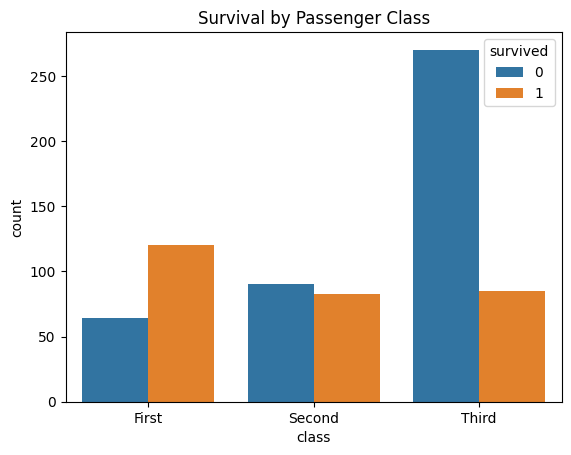

In [ ]:
sns.countplot(data=df, x='class', hue='survived')
plt.title('Survival by Passenger Class')
plt.show()

Age Distribution

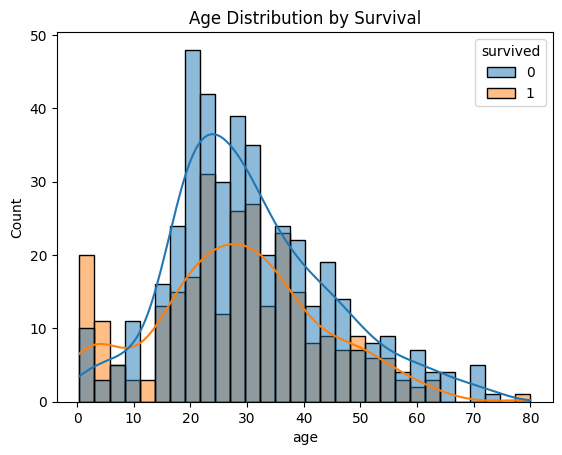

In [ ]:
sns.histplot(data=df, x='age', hue='survived', bins=30, kde=True)
plt.title('Age Distribution by Survival')
plt.show()

Pivot Table

In [ ]:
pd.pivot_table(df, index='class', columns='sex', values='survived')

/tmp/ipython-input-8-3292039206.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(df, index='class', columns='sex', values='survived')


sex,female,male
class,,
First,0.963855,0.396040
Second,0.918919,0.151515
Third,0.460784,0.150198


Correlation Heatmap

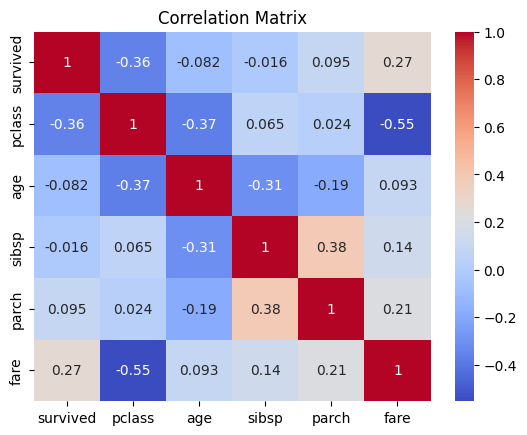

In [ ]:
import numpy as np  # make sure numpy is imported!

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=np.number)

# Plot heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df[['age']]
X = pd.get_dummies(df[['pclass', 'sex']]).join(X)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

preds = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, preds))

Accuracy: 0.7902097902097902


This is the complete mini project for titanic survival analysis.